# Customer Segmentation

### Here we segment customers based on Revenue ,Service Usage and Subscription type 

In [10]:
import pandas as pd
from  sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [11]:
df = pd.read_csv("Encoded(3).csv")


#### Segementation based on *Revenue* 

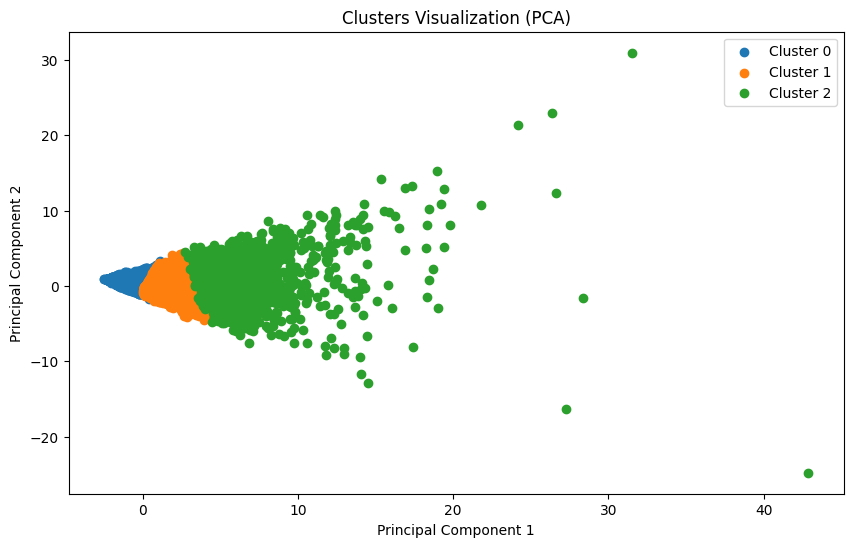

Silhouette Score: 0.43268616938539306
   MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0       39.844166      282.465381             37.199844   
1       89.491847      982.869428             67.078753   
2      224.435914     2051.608357             87.575779   

   DirectorAssistedCalls  OverageMinutes  
0               0.382966       13.319635  
1               1.648737       69.062944  
2               6.065191      405.347734  
Cluster 0: 34662 customers
Cluster 1: 13677 customers
Cluster 2: 1413 customers


In [13]:
revenue_features = ["MonthlyRevenue","MonthlyMinutes","TotalRecurringCharge","DirectorAssistedCalls","OverageMinutes"]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[revenue_features])

pca = PCA(n_components=2)
data_pca = pca.fit_transform(scaled_data)

k = 3 

kmeans  = KMeans(n_clusters = k ,random_state=42)
df['Cluster'] =  kmeans.fit_predict(scaled_data)

plt.figure(figsize=(10, 6))
for cluster_id in range(k):
    cluster_data = data_pca[df['Cluster'] == cluster_id]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_id}')
    
plt.title('Clusters Visualization (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

silhouette_avg = silhouette_score(scaled_data, df['Cluster'])
print(f"Silhouette Score: {silhouette_avg}")

cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_centers_df = pd.DataFrame(cluster_centers,columns=revenue_features)
print(cluster_centers_df)

for cluster_id in range(k):
    cluster_data = df[df['Cluster']==cluster_id]
    print(f"Cluster {cluster_id}: {len(cluster_data)} customers")
    